## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

## Import Dataset

In [2]:
blobs_df = pd.read_csv('cluster_two_blobs.csv')
blobs_outlier_df = pd.read_csv('cluster_two_blobs_outliers.csv')

In [3]:
blobs_df.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


In [4]:
blobs_outlier_df.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


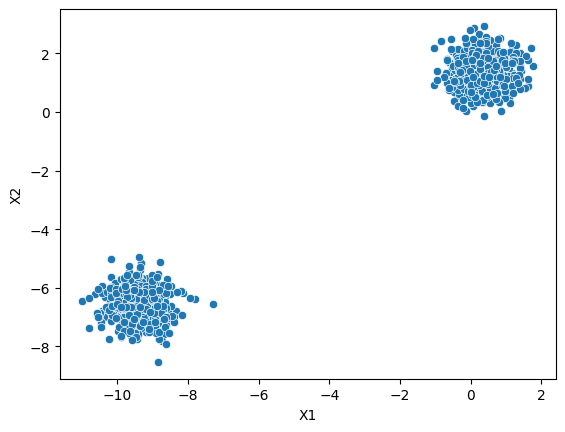

In [5]:
sns.scatterplot(data=blobs_df, x='X1', y='X2')
plt.show()

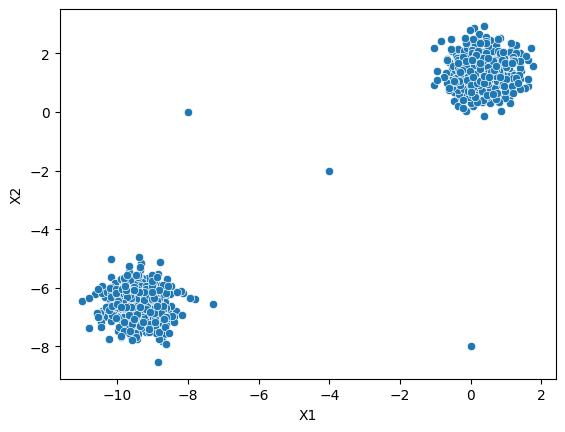

In [6]:
sns.scatterplot(data=blobs_outlier_df, x='X1', y='X2')
plt.show()

## Label Discovery

In [7]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(
        data=data,
        x='X1',
        y='X2',
        hue=labels,
        palette='viridis'
    )

In [8]:
model = DBSCAN()

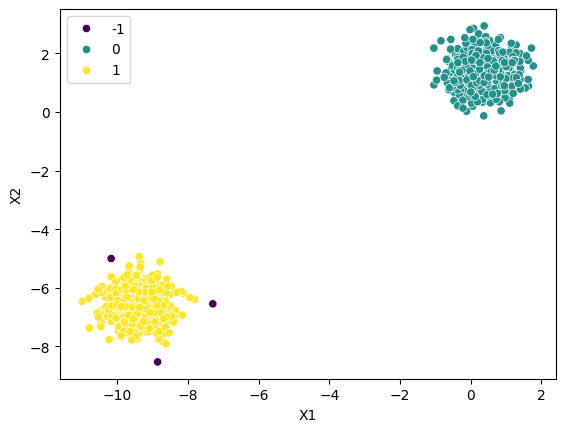

In [9]:
display_categories(model=model, data=blobs_df)

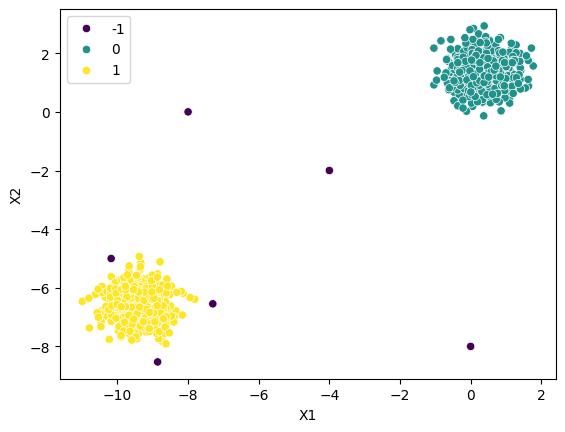

In [10]:
display_categories(model=model, data=blobs_outlier_df)

### Epsilon Parameter

In [11]:
model = DBSCAN(eps=0.001)

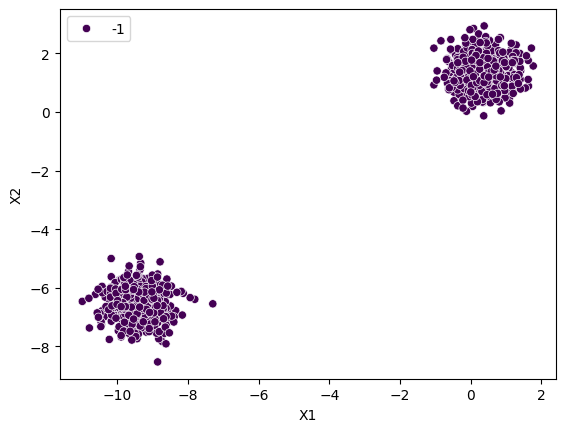

In [12]:
display_categories(model=model, data=blobs_df)

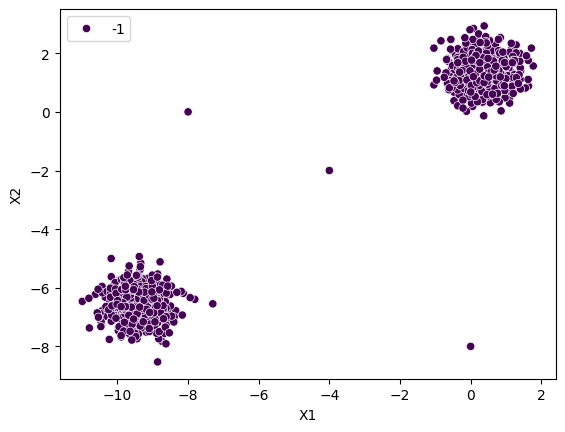

In [13]:
display_categories(model=model, data=blobs_outlier_df)

In [14]:
model = DBSCAN(eps=10)

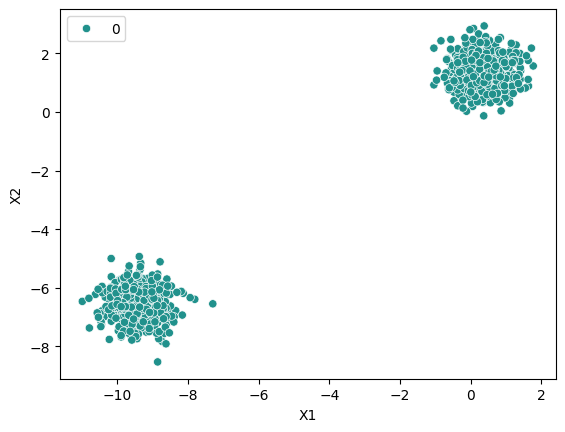

In [15]:
display_categories(model=model, data=blobs_df)

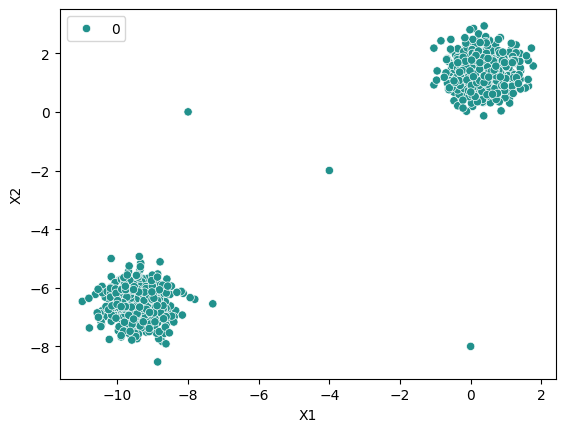

In [16]:
display_categories(model=model, data=blobs_outlier_df)

In [17]:
model = DBSCAN(eps=1)

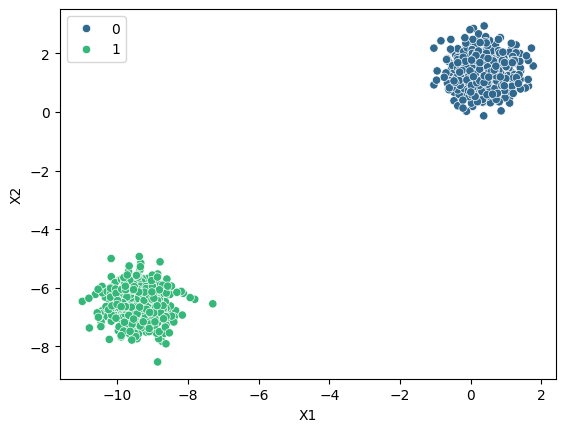

In [18]:
display_categories(model=model, data=blobs_df)

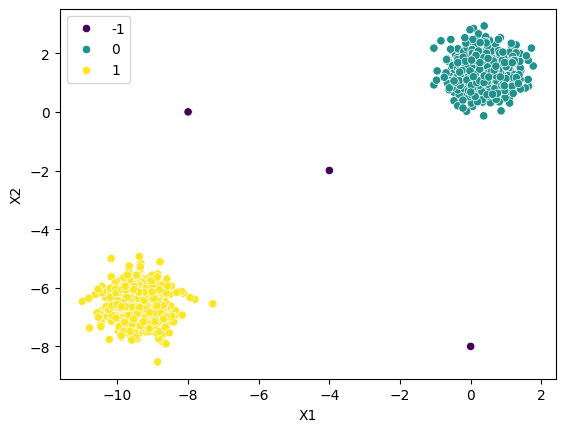

In [19]:
display_categories(model=model, data=blobs_outlier_df)

### Percentage of Outliers

In [20]:
model.labels_

array([ 0,  1,  0, ..., -1, -1, -1])

In [21]:
np.sum(model.labels_ == -1)

np.int64(3)

In [22]:
len(model.labels_)

1003

In [23]:
100 * np.sum(model.labels_ == -1) / len(model.labels_)

np.float64(0.29910269192422734)

In [24]:
outlier_percentage = []
number_of_outliers = []

for eps in np.linspace(0.001, 7, 200):
    model = DBSCAN(eps=eps)
    model.fit_predict(blobs_outlier_df)

    # Total Outliers Found
    number_of_outliers.append(np.sum(model.labels_ == -1))

    # Percentage of points classified as outliers
    percentage_outliers = 100 * np.sum(model.labels_ == -1) / len(model.labels_)
    outlier_percentage.append(percentage_outliers)

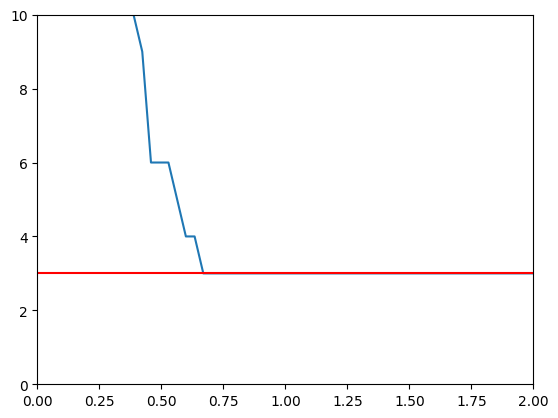

In [25]:
sns.lineplot(
    x=np.linspace(0.001, 7, 200),
    y=number_of_outliers
)
plt.xlim(0, 2)
plt.ylim(0, 10)
plt.hlines(y=3, xmin=0, xmax=2, color='red')
plt.show()

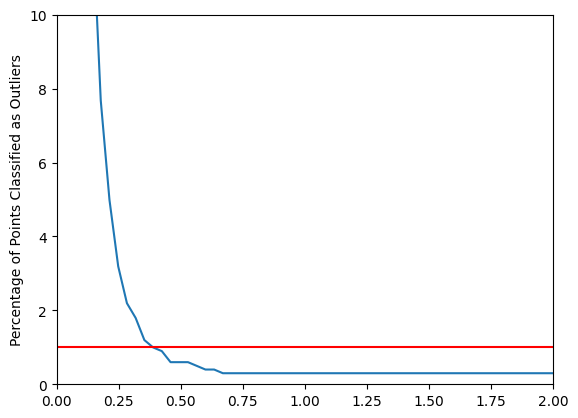

In [26]:
sns.lineplot(
    x=np.linspace(0.001, 7, 200),
    y=outlier_percentage
)
plt.xlim(0, 2)
plt.ylim(0, 10)
plt.hlines(y=1, xmin=0, xmax=2, color='red')
plt.ylabel("Percentage of Points Classified as Outliers")
plt.show()

### Minimum Number of Points

In [27]:
outlier_percentage = []
number_of_outliers = []

for n in np.arange(1, 100):
    model = DBSCAN(min_samples=n)
    model.fit_predict(blobs_outlier_df)

    # Total Outliers Found
    number_of_outliers.append(np.sum(model.labels_ == -1))

    # Percentage of points classified as outliers
    percentage_outliers = 100 * np.sum(model.labels_ == -1) / len(model.labels_)
    outlier_percentage.append(percentage_outliers)

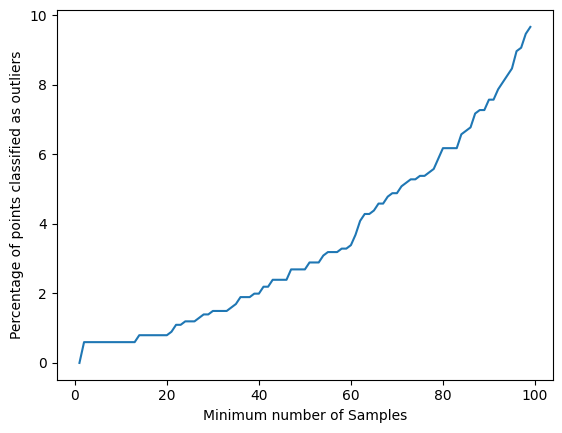

In [28]:
sns.lineplot(
    x=np.arange(1, 100),
    y=outlier_percentage
)
plt.xlabel("Minimum number of Samples")
plt.ylabel("Percentage of points classified as outliers")
plt.show()